<a href="https://colab.research.google.com/github/ashmangla/ashmangla.gitbhub.io/blob/main/Project_Full_Code_Notebook_EasyVisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
#import all the needed libraries
import numpy as np
import pandas as pd
import warnings

#sklearn imports
from sklearn.model_selection import train_test_split
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

#Over and under sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



#import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)
warnings.filterwarnings("ignore")



# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/EasyVisa.csv")

# **Overview of the Dataset**

* Observations

* Sanity checks

In [ ]:
visa_df = data.copy()

In [ ]:
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
visa_df.shape

(25480, 12)

In [ ]:
visa_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
visa_df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

In [ ]:
def print_valuecounts(df, column_name):
  # Assuming 'data' is your DataFrame
  counts = df[column_name].value_counts()
  percentages = df[column_name].value_counts(normalize=True)

  # Combine into one DataFrame
  summary = pd.concat([counts, percentages], axis=1)
  summary.columns = ['Count', 'Proportion']
  print(summary)

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(visa_df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print_valuecounts(visa_df,column) ##  Complete the code to print the count of each unique value in each column
    print("=" * 50)

           Count  Proportion
case_id                     
EZYV25480      1    0.000039
EZYV01         1    0.000039
EZYV02         1    0.000039
EZYV03         1    0.000039
EZYV04         1    0.000039
...          ...         ...
EZYV13         1    0.000039
EZYV12         1    0.000039
EZYV11         1    0.000039
EZYV10         1    0.000039
EZYV09         1    0.000039

[25480 rows x 2 columns]
               Count  Proportion
continent                       
Asia           16861    0.661735
Europe          3732    0.146468
North America   3292    0.129199
South America    852    0.033438
Africa           551    0.021625
Oceania          192    0.007535
                       Count  Proportion
education_of_employee                   
Bachelor's             10234    0.401648
Master's                9634    0.378100
High School             3420    0.134223
Doctorate               2192    0.086028
                    Count  Proportion
has_job_experience                   
Y          

In [ ]:
visa_df.loc[visa_df["no_of_employees"] < 0].shape

(33, 12)

In [ ]:
# taking the absolute values for number of employees
visa_df["no_of_employees"] = abs(visa_df["no_of_employees"])

In [ ]:
visa_df.loc[visa_df["prevailing_wage"] <= 0].shape  # prevailing wage column has no missing values

(0, 12)

In [ ]:
visa_df['case_id'].nunique()

25480

In [ ]:
visa_df.drop(["case_id"],axis=1, inplace=True)

# Univariate Analyses

In [ ]:
# Helper functions to create barplots, boxplots and histograms


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
visa_df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


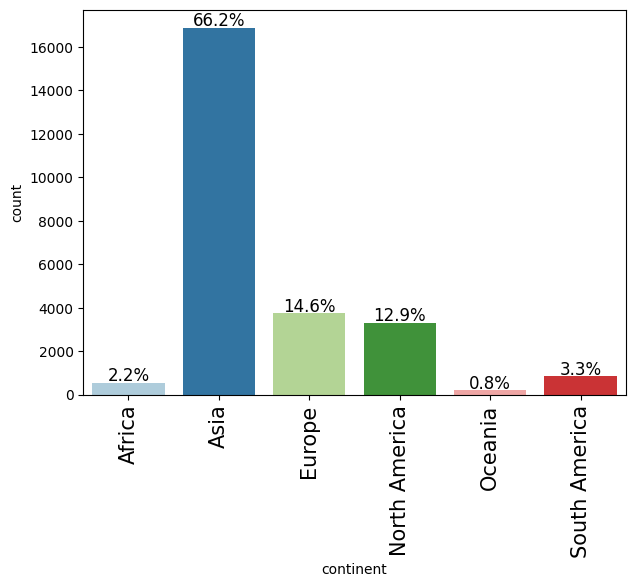

In [ ]:
labeled_barplot(visa_df, "continent", perc=True)

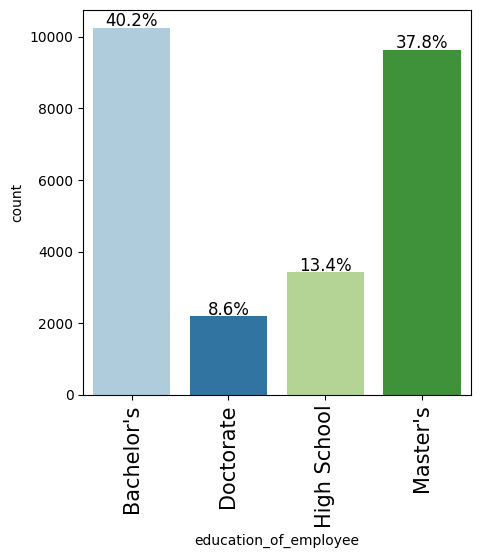

In [ ]:
labeled_barplot(visa_df, "education_of_employee", perc=True)

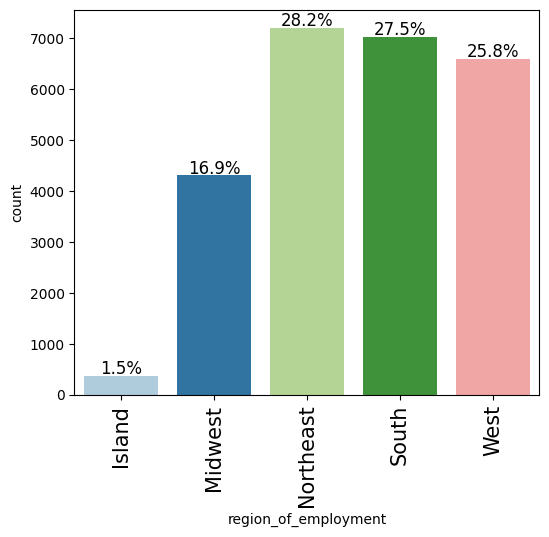

In [ ]:
labeled_barplot(visa_df, "region_of_employment", perc=True)

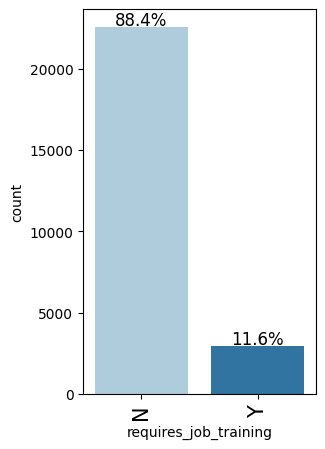

In [ ]:
labeled_barplot(visa_df, "requires_job_training", perc=True)

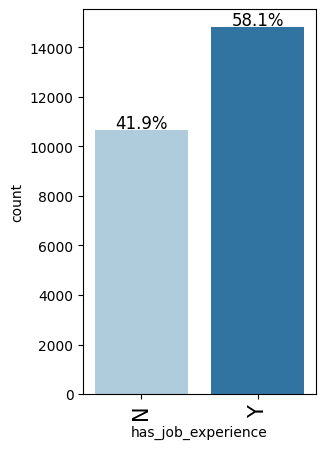

In [ ]:
labeled_barplot(visa_df, "has_job_experience", perc=True)

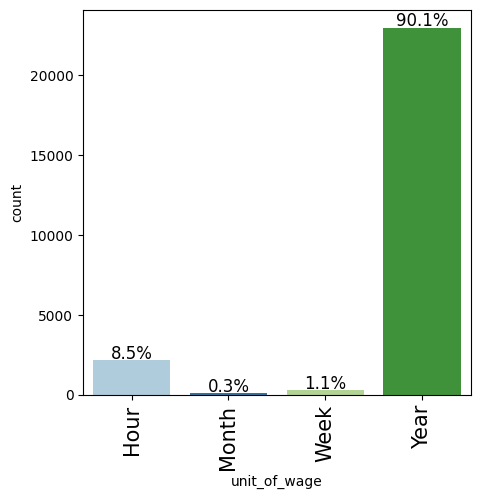

In [ ]:
labeled_barplot(visa_df, "unit_of_wage", perc=True)

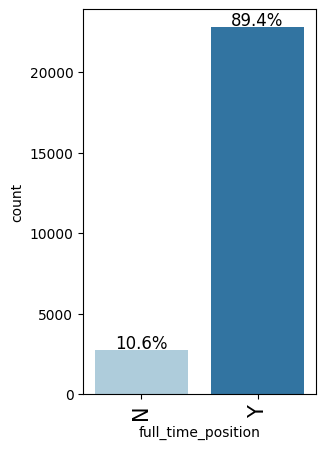

In [ ]:
labeled_barplot(visa_df, "full_time_position", perc=True)

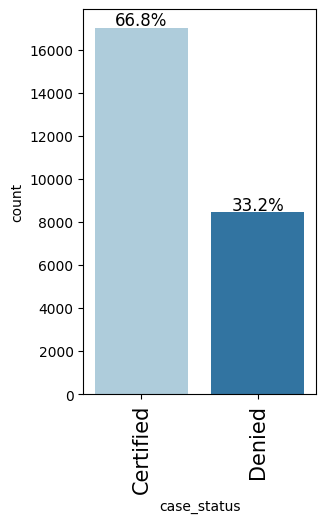

In [ ]:
labeled_barplot(visa_df, "case_status", perc=True)

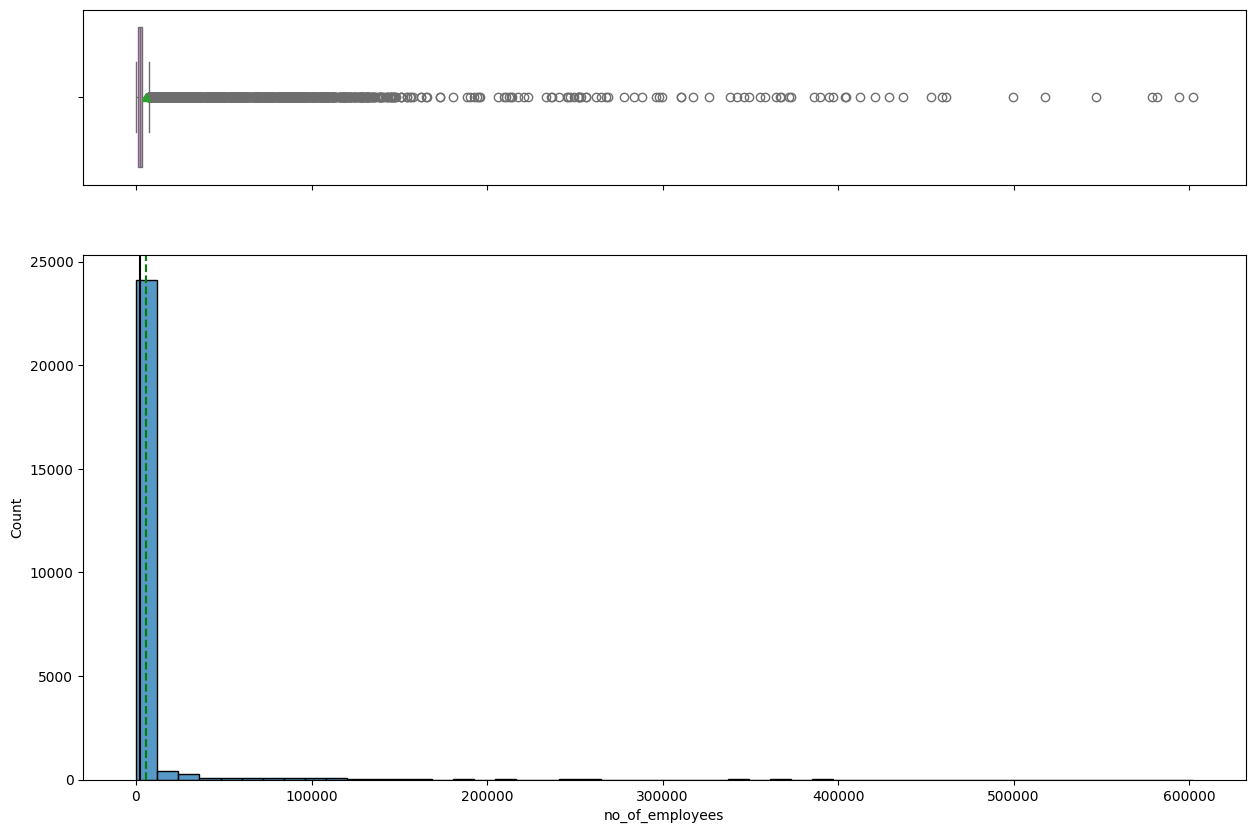

In [ ]:
#Looking at the numerical columns now
histogram_boxplot(visa_df, 'no_of_employees', bins = 50)

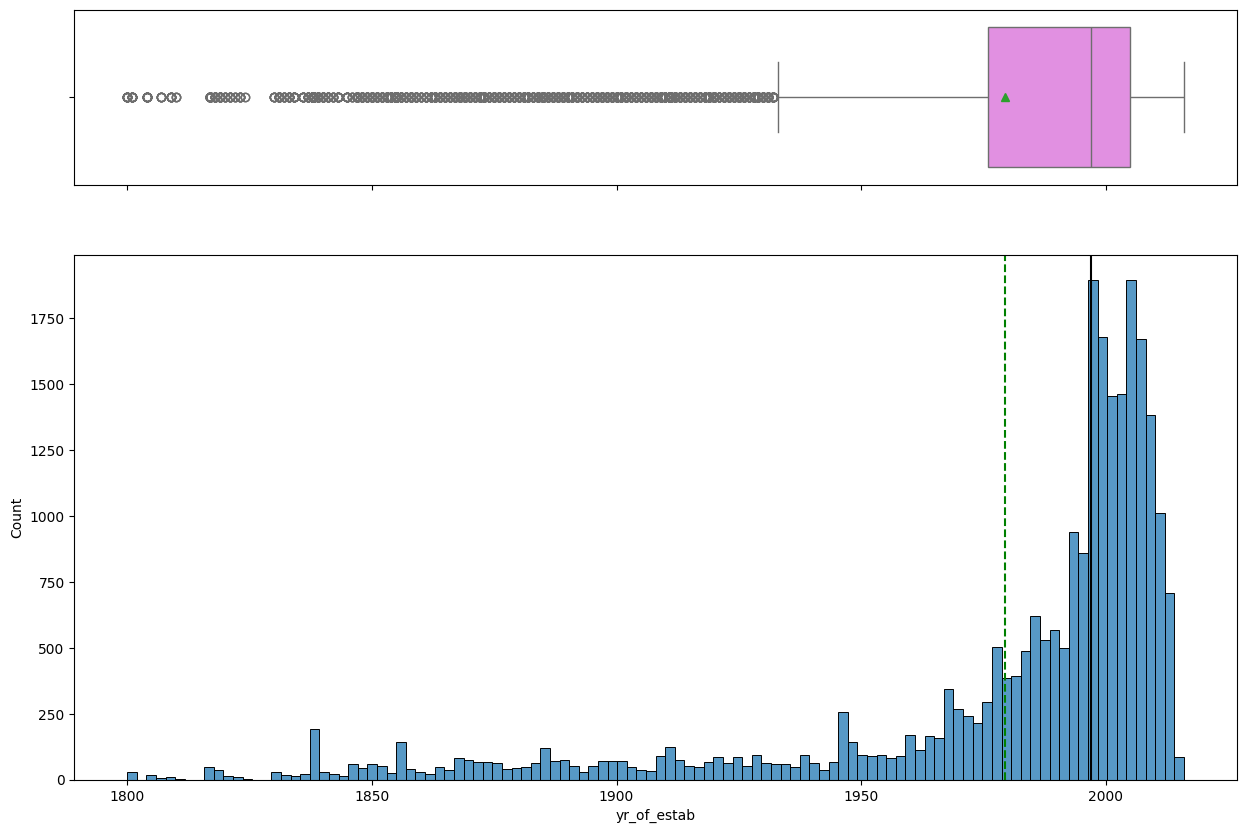

In [ ]:
histogram_boxplot(visa_df, "yr_of_estab")

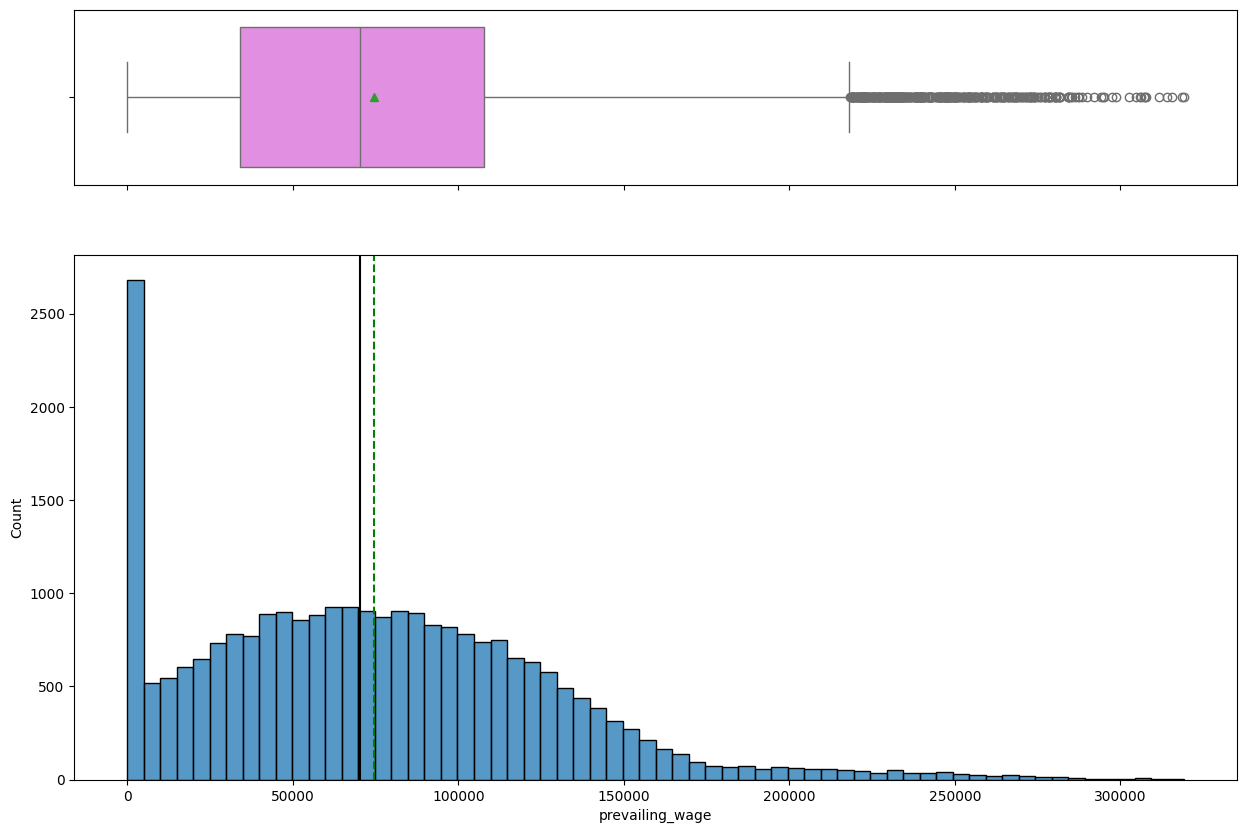

In [ ]:
#Looking at the numerical columns now
histogram_boxplot(visa_df, 'prevailing_wage')

Observations from Univariate Analyses:
1. Majority of the candidates are from Asia (66.2%)  followed by 14.6 % from Europe and then 13% from North America - this accounts for 94% of the total dataset
2. It seems like majority of the candidates are well educated with 40% having a Bachelors and 46.2% a graduate degree (Masters +Doctorate). Only 13.6% have a high school graduation.
3. 58% of the candidates have job experience and 42% do not
4. Interestingly 88.4% don't need on the job training indicating well matched skills. This is interesting because only 11.5% need training which is even lower than the the number of candidates possessing only high school diploma (13.6%) and infact the folks having non job experience is so large (42%) - yet it seems many in this still dont require on the the job training.
5. Most candidates (90%) are on annual wage, 8% are on hourly wage.
6. 89.3% have a fulltime position
7. 66.8% of the candidates were certified and 33.2% were denied.
8. Region of employment is as expected with fairly well balanced across the North east, South and West which tend to have more diverse populations and more industries that are global in nature. A dip in the midwest and hardly any on the islands as there is limited employment opporutnites there.

9. Number of employees is highly right skewed with lot of outliers - the mean at ~5667 is more than 2x the median at 2109. 75th percentile is at 3504 whereas the max is at 602069. This means most of the companies are 3504 employees or less.
10. Years of establishment is left skewed showing most of the employers are more recently established (year 2000+)
11. Prevailing wage is also right skewed hence the mean (74455.814592	)is larger than the median 70308.21. The range is large with the min at 2.14 and max at 319210.27. This could also be likely due to the fact that we have some at hourly and some at annual wage. Given that most of the cnadidates are at annual wage, it may be ok to leave this as untreated for now.



# Bivariate Analysis

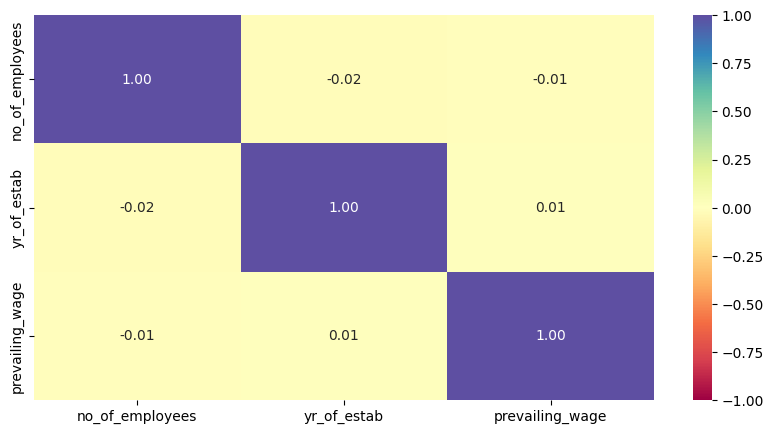

In [ ]:
#heatmap
cols_list = visa_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 5))
sns.heatmap(
    visa_df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There is negative correlation between years of establishment and number of employees, as well as number of employees and prevailing wage - but a low value. There is hardly any correlation at all . Lets check the other data and how it related to case_status


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


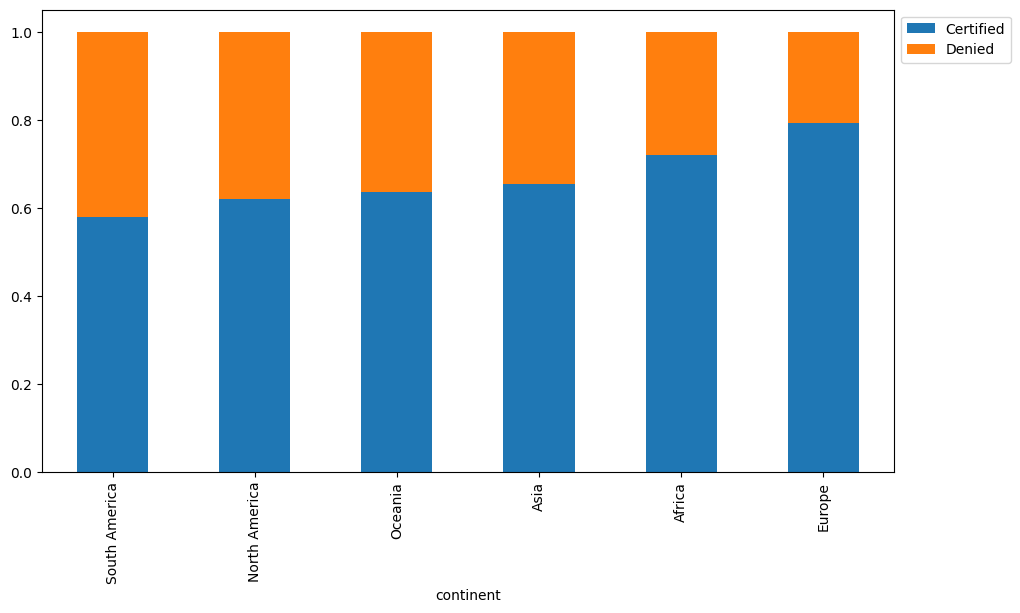

In [ ]:
stacked_barplot(visa_df, "continent", "case_status")

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


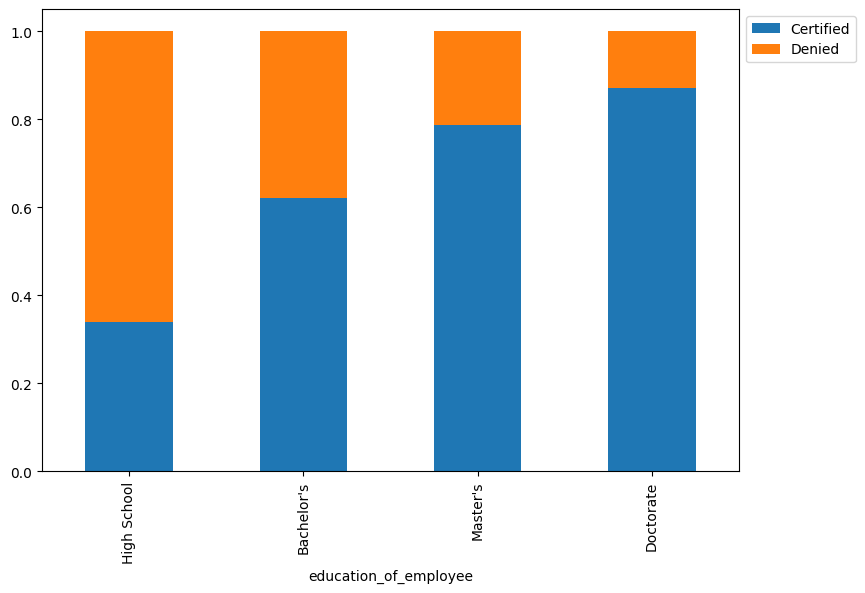

In [ ]:
stacked_barplot(visa_df, "education_of_employee", "case_status")

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


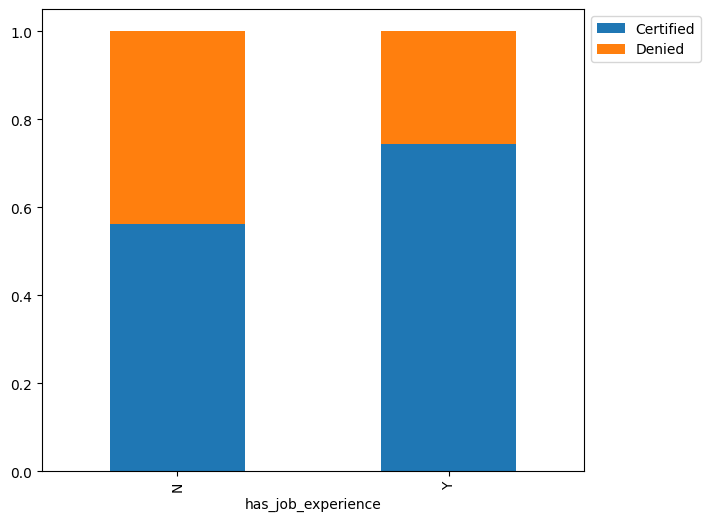

In [ ]:
stacked_barplot(visa_df, "has_job_experience", "case_status")

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


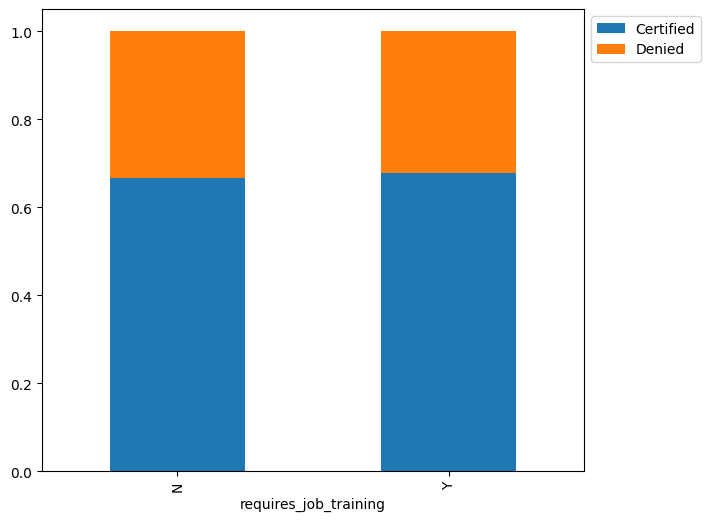

In [ ]:
stacked_barplot(visa_df, "requires_job_training", "case_status")

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


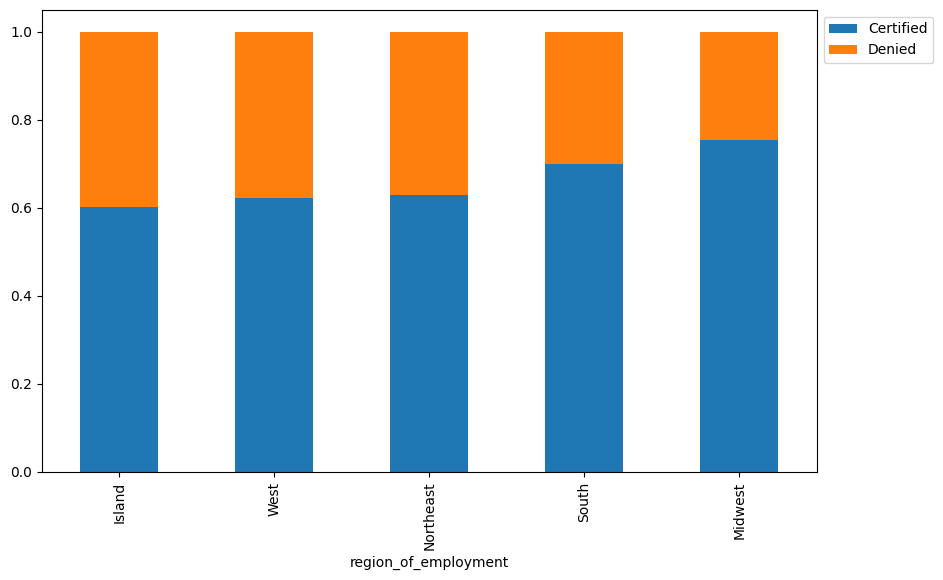

In [ ]:
stacked_barplot(visa_df, "region_of_employment", "case_status")

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


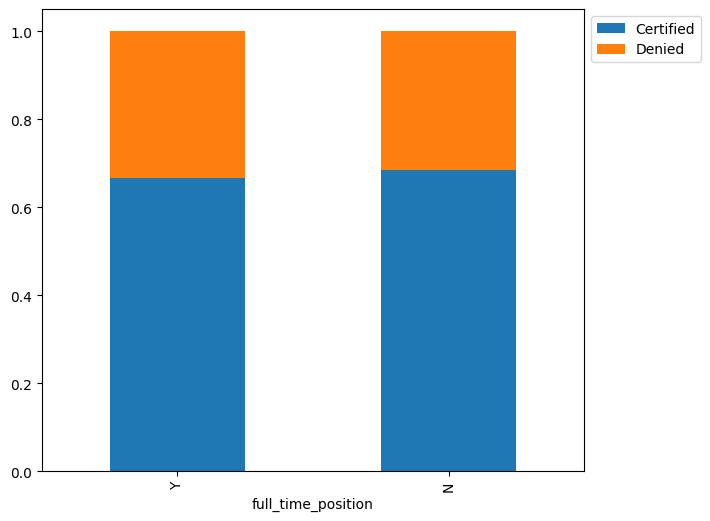

In [ ]:
stacked_barplot(visa_df, "full_time_position", "case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


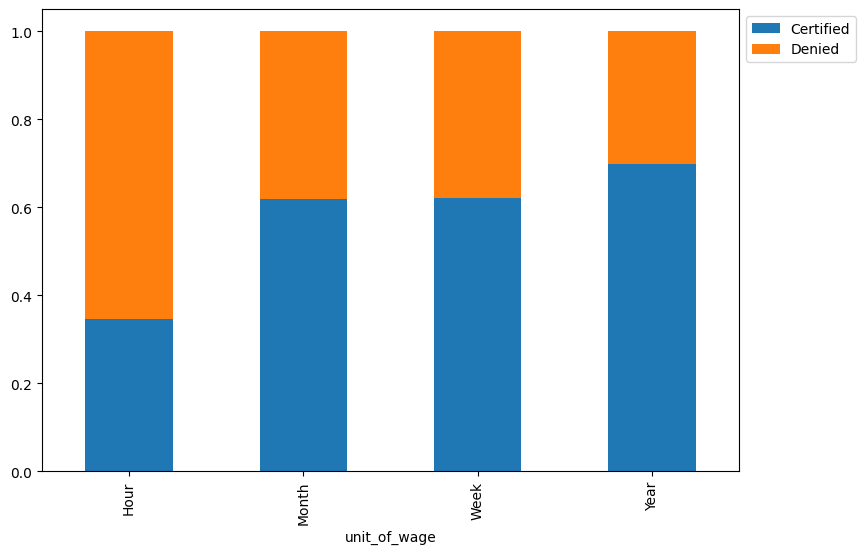

In [ ]:
stacked_barplot(visa_df, "unit_of_wage", "case_status")

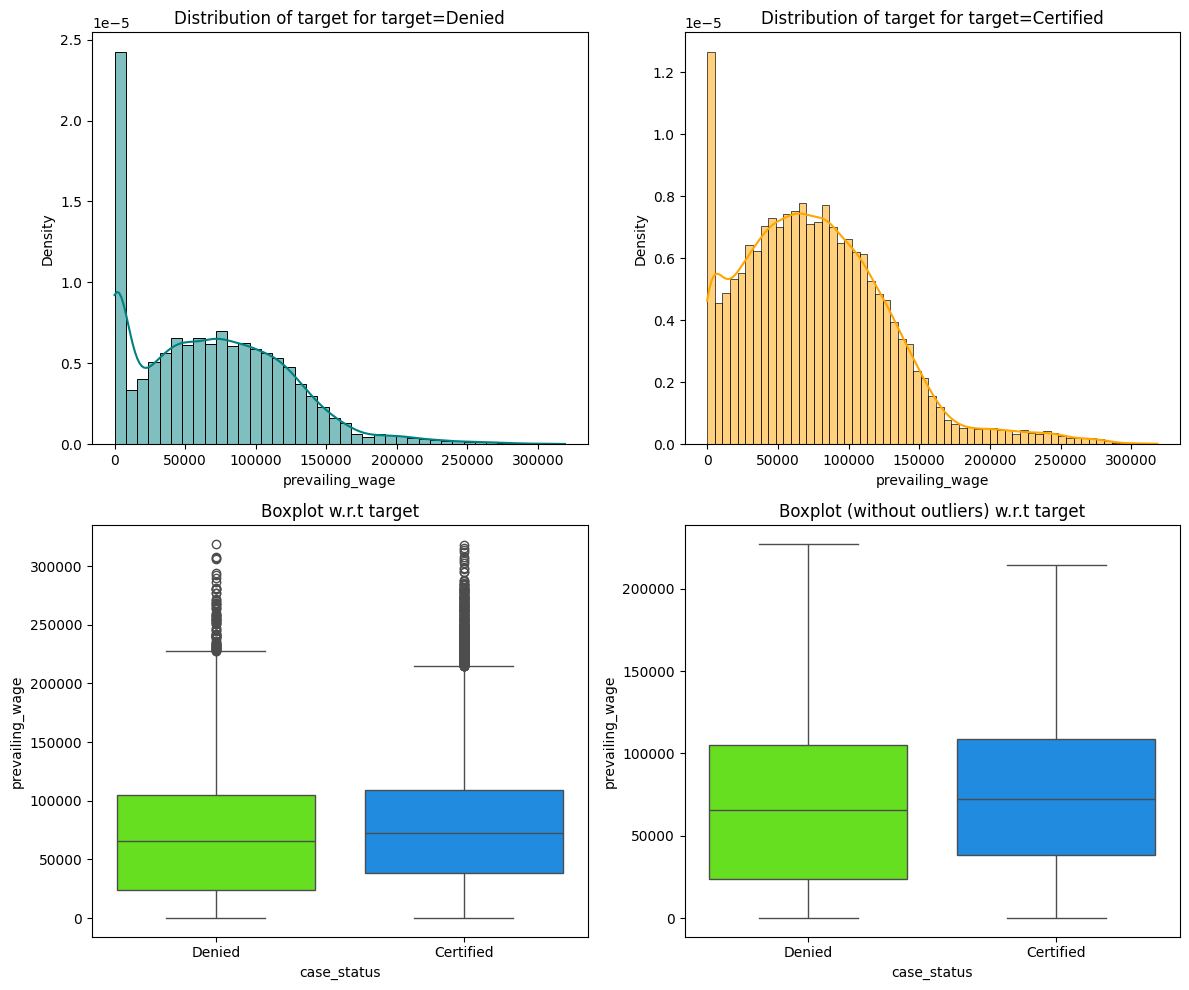

In [ ]:
distribution_plot_wrt_target(visa_df, "prevailing_wage", "case_status")

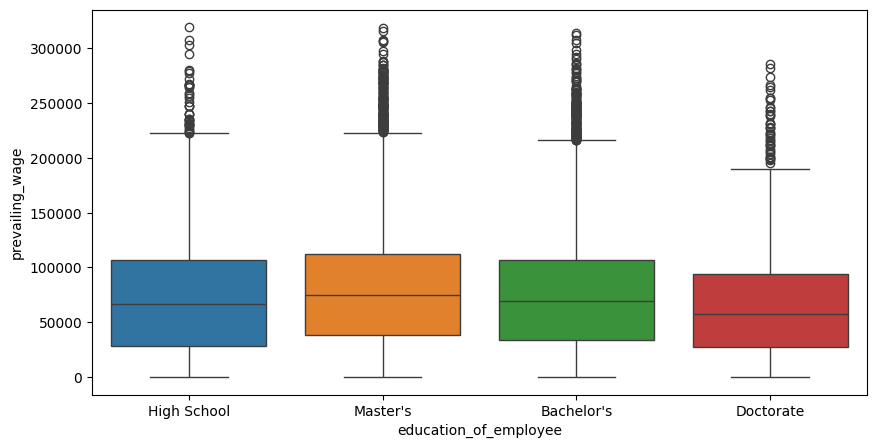

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=visa_df, x="education_of_employee", y="prevailing_wage", hue="education_of_employee")
plt.show()

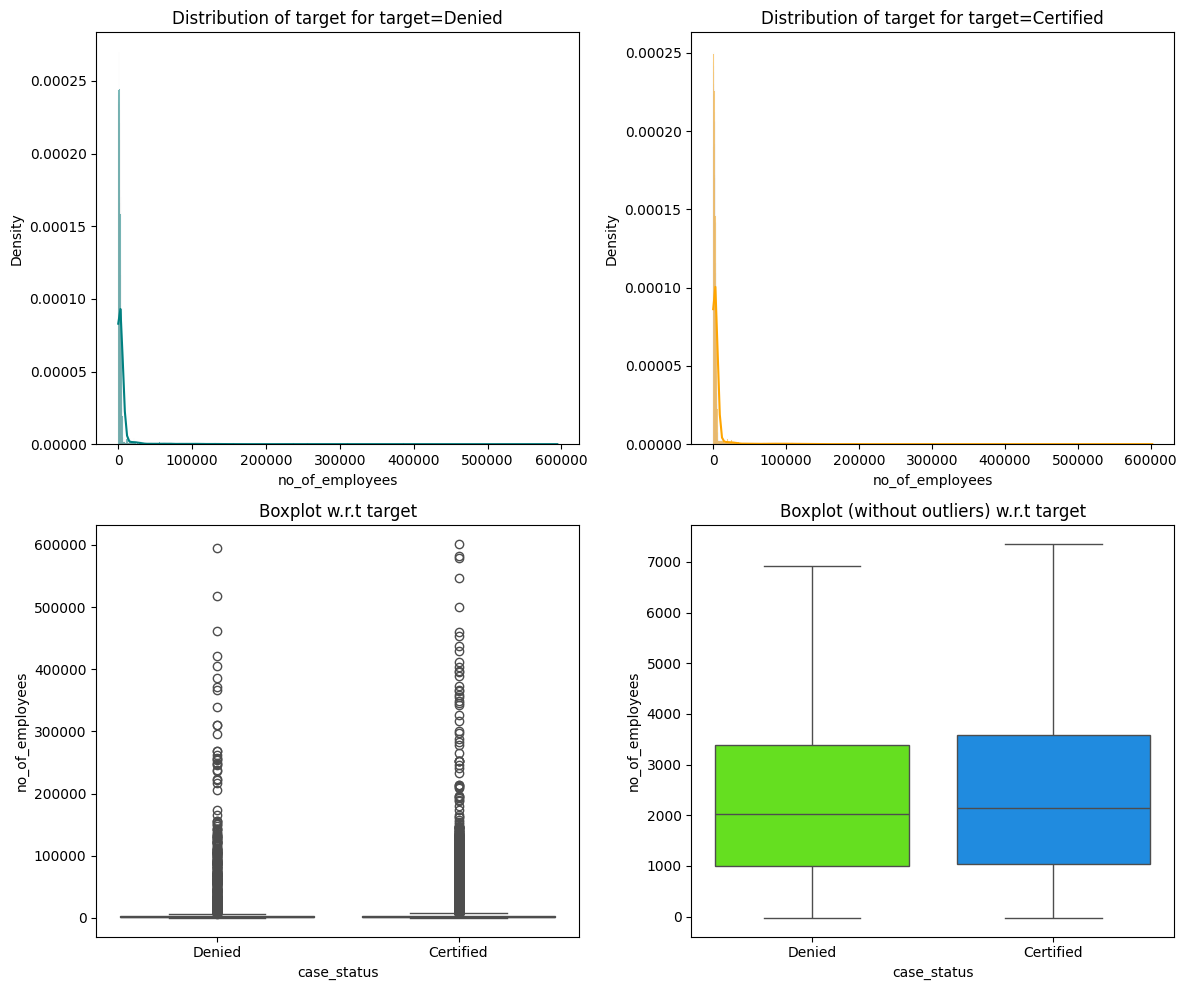

In [ ]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

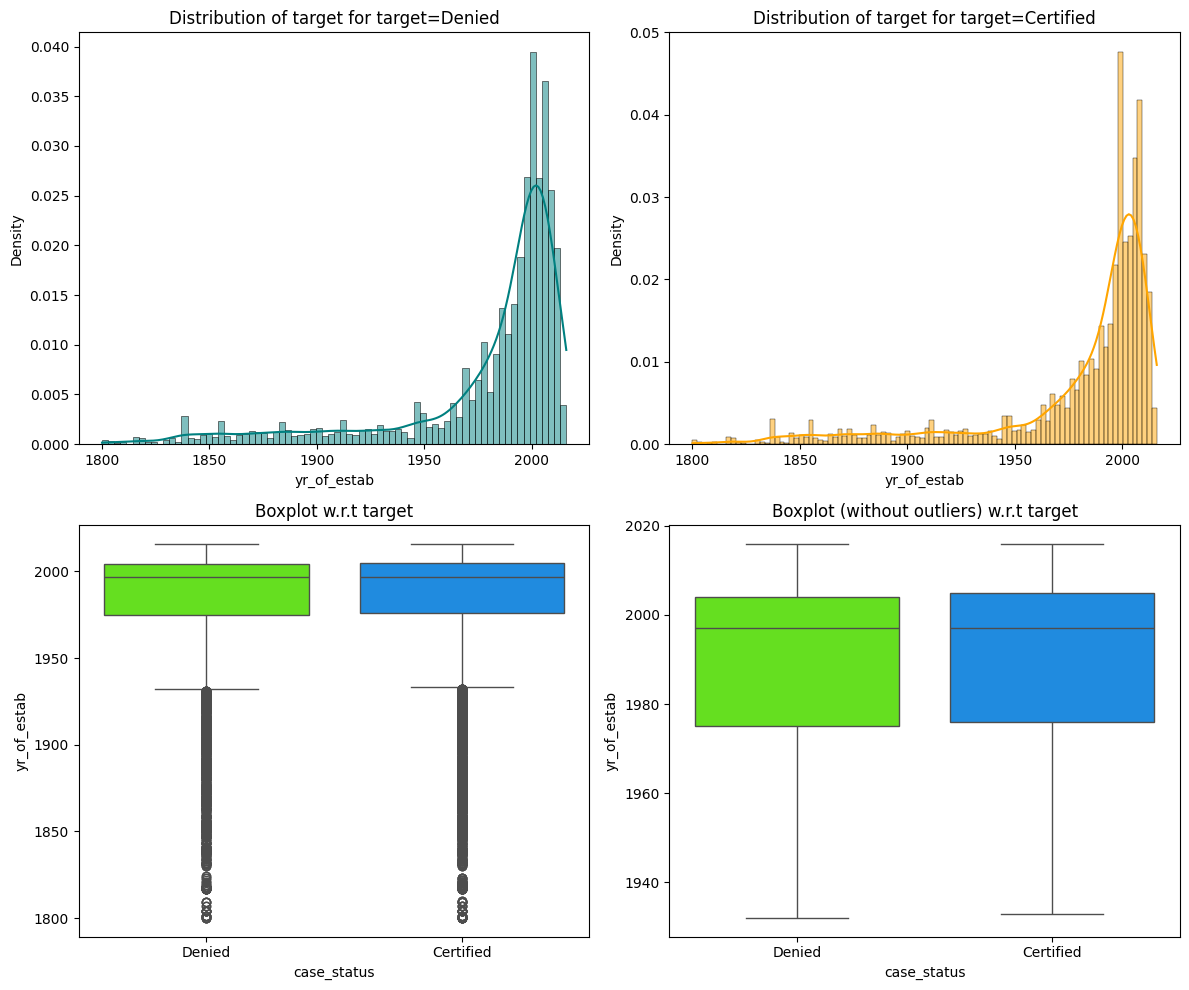

In [ ]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

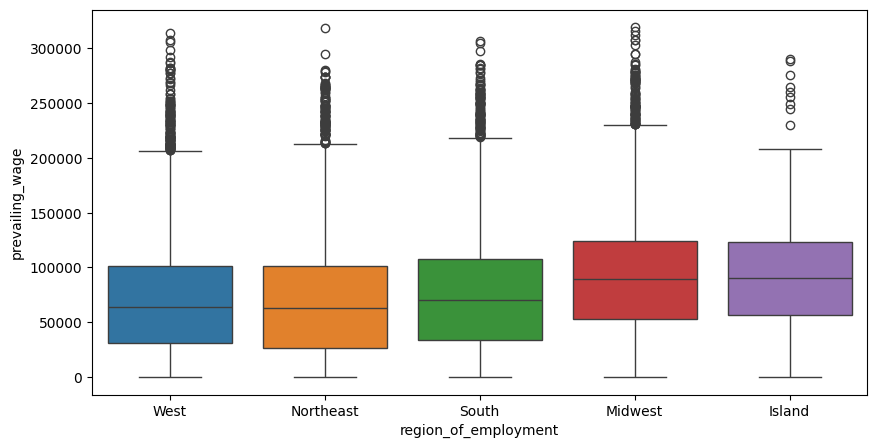

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", hue="region_of_employment")
plt.show()


*   Employer details like years of estab, number of employees do not seem to impact the case status
*   Job training required or not or full time position or not does not seem to have any bearing on whether the case was denied or certified
*   Prevailing wage for denials is slightly lower than the certified ones . Interestingly prevailing wage does not seem to be a function of the education - infact doctorate seems to have lower wages than high school which seems wierd. Prevailing wage is a bit higher in Midwest and Islands but all of the others, which account for the larger population in the data set, show the same distribution
*   Hourly wagers seem to have higher denials
*   There seems to be a direct correlation between education level and certifications. Higher education seems to lead to better chances of being certified
*   percentage of people with no job experience have higher denials
*   Seems like highest percentage of denials are for people from South America , then North America. percentage of People from Europe have the least denials. Interestingly percentage of people frm Africa have lesser denials than North or South America









# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Check categorical variables for blanks or space only values
cat_cols = visa_df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    blanks = visa_df[col][data[col].astype(str).str.fullmatch(r"\s*")]
    if not blanks.empty:
        print(f"Column '{col}' has {len(blanks)} blank/space-only values")
    else:
      print(f"Column '{col}' is populated")

Column 'continent' is populated
Column 'education_of_employee' is populated
Column 'has_job_experience' is populated
Column 'requires_job_training' is populated
Column 'region_of_employment' is populated
Column 'unit_of_wage' is populated
Column 'full_time_position' is populated
Column 'case_status' is populated


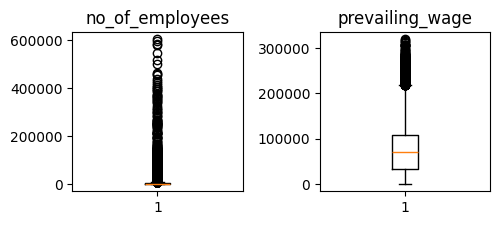

In [ ]:
numeric_columns = ['no_of_employees','prevailing_wage']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 6, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

At present we will not treat outliers .

In [ ]:
#We already checked that there are no missing values  and we have treated the number of employees already

#codify the Y/N columns
visa_df["case_status"] = visa_df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
visa_df["has_job_experience"] = visa_df["has_job_experience"].apply(lambda x: 1 if x == "Y" else 0)
visa_df["full_time_position"] = visa_df["full_time_position"].apply(lambda x: 1 if x == "Y" else 0)
visa_df["requires_job_training"] = visa_df["requires_job_training"].apply(lambda x: 1 if x == "N" else 0)

#education has an order so we will use that
visa_df["education_of_employee"] = visa_df["education_of_employee"].replace({
    "High School":0,
    "Master's":1,
    "Bachelor's":2,
    "Doctorate":3
})



In [ ]:
# One hot encode the other columns
oneHotCols = ["continent","unit_of_wage","region_of_employment"]
visa_df=pd.get_dummies(visa_df, columns=oneHotCols, drop_first=True,dtype=int)

In [ ]:
visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   has_job_experience              25480 non-null  int64  
 2   requires_job_training           25480 non-null  int64  
 3   no_of_employees                 25480 non-null  int64  
 4   yr_of_estab                     25480 non-null  int64  
 5   prevailing_wage                 25480 non-null  float64
 6   full_time_position              25480 non-null  int64  
 7   case_status                     25480 non-null  int64  
 8   continent_Asia                  25480 non-null  int64  
 9   continent_Europe                25480 non-null  int64  
 10  continent_North America         25480 non-null  int64  
 11  continent_Oceania               25480 non-null  int64  
 12  continent_South America         

Everything is numerical now - we can move to model building

# **Model Building**

In [ ]:
#separate the target and indepedent variables
X = visa_df.drop(["case_status"], axis=1)
y = visa_df["case_status"]

In [ ]:
#Split the data set into temp and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)
#Split the temp into training and x-validaiton
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of the Validation set: ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (14332, 19)
Shape of the Validation set:  (4778, 19)
Shape of test set :  (6370, 19)
Percentage of classes in training set:
case_status
1    0.667876
0    0.332124
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667853
0    0.332147
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


Since both False negatives - predicting denied when its granted and False positives: predicted granted when it should be denied are important we will focus on optimizing the F1 score which balances both recall and precision. First we will include all the helper functions for calculating score and confusion matrix etc.

In [ ]:
# defining a function to compute different metrics to check performance of the model
def model_performance_classification(
    model, predictors, target
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight="balanced")))
models.append(("Ada Boost", AdaBoostClassifier(n_estimators=100, random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9891042430591933
Random Forest: 1.0
Ada Boost: 0.8210264027984091
GBM: 0.8317482106088833
dtree: 1.0

Validation Performance:

Bagging: 0.7759134389211227
Random Forest: 0.8004170390229371
Ada Boost: 0.8174339731562996
GBM: 0.8203389830508474
dtree: 0.7373546968268929


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9891, Validation Score: 0.7759, Difference: 0.2132
Random Forest: Training Score: 1.0000, Validation Score: 0.8004, Difference: 0.1996
Ada Boost: Training Score: 0.8210, Validation Score: 0.8174, Difference: 0.0036
GBM: Training Score: 0.8317, Validation Score: 0.8203, Difference: 0.0114
dtree: Training Score: 1.0000, Validation Score: 0.7374, Difference: 0.2626


In [ ]:
#lets improve performance by oversampling

In [ ]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 9572
Before Oversampling, counts of label 'Denied': 4760 

After Oversampling, counts of label 'Certified': 9572
After Oversampling, counts of label 'Denied': 9572 

After Oversampling, the shape of train_X: (19144, 19)
After Oversampling, the shape of train_y: (19144,) 



In [ ]:

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9872501180544625
Random Forest: 1.0
Ada Boost: 0.7855901890648952
GBM: 0.8034616960262188
dtree: 1.0

Validation Performance:

Bagging: 0.7619504396482814
Random Forest: 0.7879815100154083
Ada Boost: 0.7954580805724063
GBM: 0.8083385189794648
dtree: 0.7311793729110297


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9873, Validation Score: 0.7620, Difference: 0.2253
Random Forest: Training Score: 1.0000, Validation Score: 0.7880, Difference: 0.2120
Ada Boost: Training Score: 0.7856, Validation Score: 0.7955, Difference: -0.0099
GBM: Training Score: 0.8035, Validation Score: 0.8083, Difference: -0.0049
dtree: Training Score: 1.0000, Validation Score: 0.7312, Difference: 0.2688


Adaboost and GBM seem to be the top contenders here but the performance after oversampling has dropped for these so it might be useful to check with undersampling

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 9572
Before Under Sampling, counts of label 'No': 4760 

After Under Sampling, counts of label 'Yes': 4760
After Under Sampling, counts of label 'No': 4760 

After Under Sampling, the shape of train_X: (9520, 19)
After Under Sampling, the shape of train_y: (9520,) 



In [ ]:
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9770408163265306
Random Forest: 1.0
Ada Boost: 0.7055183084063951
GBM: 0.7285266457680251
dtree: 1.0

Validation Performance:

Bagging: 0.6934004675418091
Random Forest: 0.7379476584022039
Ada Boost: 0.7639027639027639
GBM: 0.7700301709688233
dtree: 0.6948275862068966


While the performance of Bagging in training has gone up , its performance in validation has decreased. All the other models also the performance has gone down with undersampling. Its better to stick with the main data set without any over or under sampling. Adaboost and GBM remain the top contenders

# **Model Performance Improvement**

## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


In [ ]:
# Base AdaBoost model
Model_ABC_tuned = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=1),  # one base estimator
    random_state=1
)

# Parameter grid
param_grid = {
    "estimator__max_depth": [2, 3],   # tune depth of tree
    "n_estimators": [50, 75, 100],    # number of boosting rounds
    "learning_rate": [0.01, 0.05, 0.1],
}

# Scoring
scorer = metrics.make_scorer(metrics.f1_score)

# Randomized Search
randomized_cv = RandomizedSearchCV(
    estimator=Model_ABC_tuned,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=10,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fit
randomized_cv.fit(X_train, y_train)

print("Best Params:", randomized_cv.best_params_)
print("Best Score:", randomized_cv.best_score_)

Best Params: {'n_estimators': 100, 'learning_rate': 0.05, 'estimator__max_depth': 3}
Best Score: 0.8242656402710551


In [ ]:
abc_tuned = randomized_cv.best_estimator_
abc_tuned.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification(abc_tuned, X_train, y_train)
print(abc_tuned_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.751605  0.878291   0.778282  0.825267


In [ ]:
abc_tuned_model_val_perf = model_performance_classification(abc_tuned, X_val, y_val)
print(abc_tuned_model_val_perf)

   Accuracy   Recall  Precision        F1
0  0.747802  0.87026   0.778307  0.821719


In [ ]:
abc_tuned_model_test_perf = model_performance_classification(abc_tuned, X_test, y_test)
print(abc_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.740816  0.876146   0.768343  0.818711


This is an excellent match and i can just likely stick with this model but will tune GBM for completeness

In [ ]:
Model_gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}


# Scoring
scorer = metrics.make_scorer(metrics.f1_score)

# Randomized Search
randomized_cv = RandomizedSearchCV(
    estimator=Model_gbc_tuned,
    param_distributions=parameters,
    n_jobs=-1,
    n_iter=10,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fit
randomized_cv.fit(X_train, y_train)

print("Best Params:", randomized_cv.best_params_)
print("Best Score:", randomized_cv.best_score_)
# Set the clf to the best combination of parameters
gbc_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Best Params: {'subsample': 0.9, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 0.05}
Best Score: 0.8266797650534354


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=np.int64(100), random_state=1,
                           subsample=0.9)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification(gbc_tuned, X_train, y_train)
print(gbc_tuned_model_train_perf)

   Accuracy   Recall  Precision        F1
0  0.757884  0.88738   0.780268  0.830384


In [ ]:
gbc_tuned_model_val_perf = model_performance_classification(abc_tuned, X_val, y_val)
print(gbc_tuned_model_val_perf)

   Accuracy   Recall  Precision        F1
0  0.747802  0.87026   0.778307  0.821719


In [ ]:
gbc_tuned_model_test_perf = model_performance_classification(abc_tuned, X_test, y_test)
print(gbc_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.740816  0.876146   0.768343  0.818711


# **Model Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        abc_tuned_model_train_perf.T,
        abc_tuned_model_val_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_train_perf.T,
        gbc_tuned_model_val_perf.T,
        gbc_tuned_model_test_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Adaboost Classifier-training",
    "Tuned Adaboost Classifier-validation",
    "Tuned Adaboost Classifier-test",
    "Tuned Gradient Boost Classifier -training",
    "Tuned Gradient Boost Classifier-validation",
    "Tuned Gradient Boost Classifier-test",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned Adaboost Classifier-training,Tuned Adaboost Classifier-validation,Tuned Adaboost Classifier-test,Tuned Gradient Boost Classifier -training,Tuned Gradient Boost Classifier-validation,Tuned Gradient Boost Classifier-test
Accuracy,0.751605,0.747802,0.740816,0.757884,0.747802,0.740816
Recall,0.878291,0.870260,0.876146,0.887380,0.870260,0.876146
Precision,0.778282,0.778307,0.768343,0.780268,0.778307,0.768343
F1,0.825267,0.821719,0.818711,0.830384,0.821719,0.818711


We get pretty much the same results likely because we chose Adaboost as the base estimator for the GBM . In this case we will just go with Adaboost

# **Actionable Insights and Recommendations**

Adaboost with the following parameters 'n_estimators': 100, 'learning_rate': 0.05, 'estimator__max_depth': 3 gives  close to 82.5% F1 score and more importantly it does so consistently over training, validation and also test sets (about 81.9% - which is close) so will do well in the production environment.

hence we will choose this model to go with the prediction on case_status.
Under and Over sampling did not help, instead they degraded the model performance

Fine tuning helped but not significantly as prior to that also Adaboos had approx. 82% F1 score.



In [ ]:
!jupyter nbconvert --execute --to html "/content/Project_Full_Code_Notebook_EasyVisa_Ashima.ipynb"

[NbConvertApp] Converting notebook /content/Project_Full_Code_Notebook_EasyVisa_Ashima.ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/backend/resource_tracker.py:299: UserWarning: resource_tracker: There appear to be 6 leaked semlock objects to clean up at shutdown
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/backend/resour

___